Problems 4, 13, 17; 18

In [225]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from statsmodels import stats

## 4.

First, let's load in the copier maintenance data.

In [226]:
# Load the data
df4 = pd.read_table('/Users/kevin/Dropbox/School/STA-580/ch1hw/Ch1-20.csv', 
                    sep=',', index_col=False)
df4.head()  # show the first five rows

,time,copiers
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1


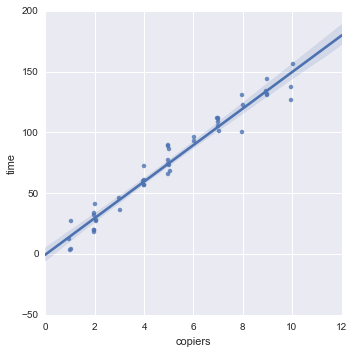

In [227]:
# Plot the data, with a little x jitter to distinguish observations
sns.lmplot('copiers', 'time', df4, x_jitter=0.05)

In [228]:
# Perform an ordinary least-squares linear regression fit
y4 = df4.time
x4 = df4.copiers
x4 = sm.add_constant(x4)
lr4 = sm.OLS(y4, x4).fit()
lr4.summary(title='Repair time vs. Number of Copiers Lin. Reg.',
           alpha=0.10)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Repair time vs. Number of Copiers Lin. Reg.                  
==============================================================================
Dep. Variable:                   time   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     968.7
Date:                Wed, 21 Oct 2015   Prob (F-statistic):           4.01e-31
Time:                        02:35:05   Log-Likelihood:                -161.27
No. Observations:                  45   AIC:                             326.5
Df Residuals:                      43   BIC:                             330.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [90.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.5802      2.804     -0.207      0.837        -5.294     4.133
copiers       15.0352      0.483     31.123      0.000        14.223    15.847
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   2.402
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.167
Skew:                          -0.388   Prob(JB):                        0.558
Kurtosis:                       2.853   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

a. 

Seaborn doesn't seem to have a way to produce dot plots, so here it is from Minitab:

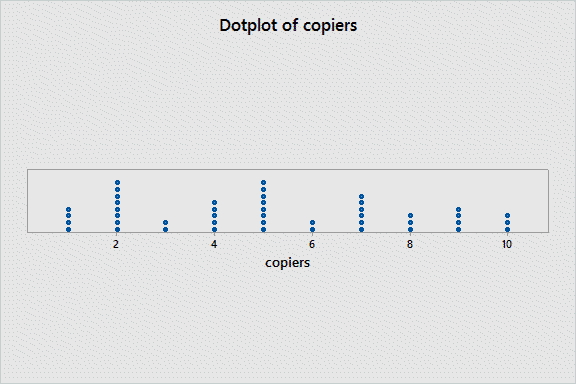

In [229]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Dotplot-of-copiers.png')

We see that the number of copiers serviced is pretty evenly spread out. There aren't any outliers with respect to this variable. 

b.

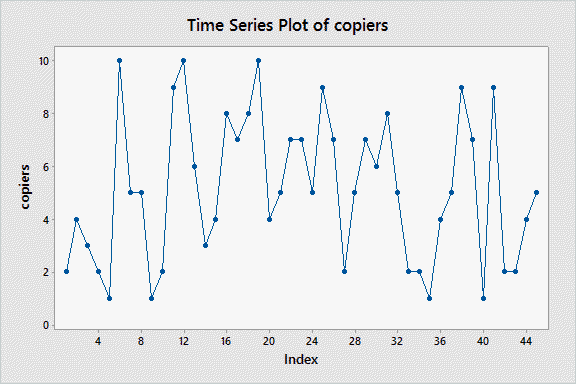

In [230]:
# From Minitab
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Time-Series-Plot-of-copiers.png')

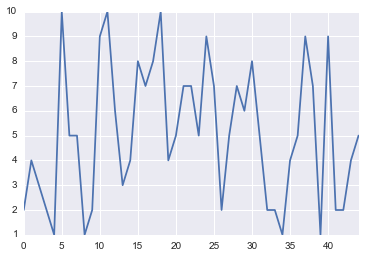

In [231]:
# from seaborn
sns.tsplot(data=df4.copiers)

The time-series (sequence) plot shows no special pattern, which means we don't need to consider changes in number of copiers serviced over time when diagnosing the aptness of our fitted regression model.

c. 
```
    Stem-and-leaf of RESI1  N  = 45
    Leaf Unit = 1.0


     1    -2  2
     2    -1  9
     6    -1  2110
     11   -0  99886
     22   -0  33222221100
    (10)  0   0011223344
     13   0   666779
     7    1   111224
     1    1   5
```

 There aren't any noteworthy features; the residuals appear to be symetrically distributed.
 
 d.

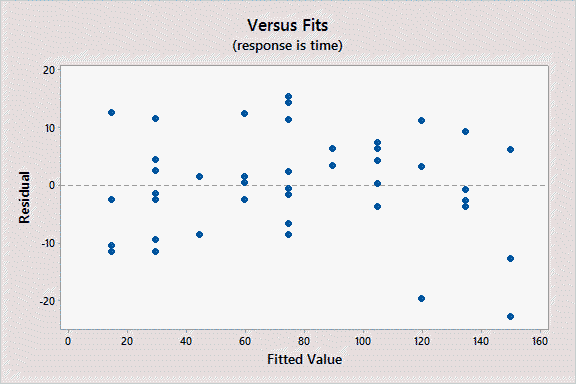

In [232]:
# Residuals vs. Fits
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Residuals-vs-Fits-for-time.png')

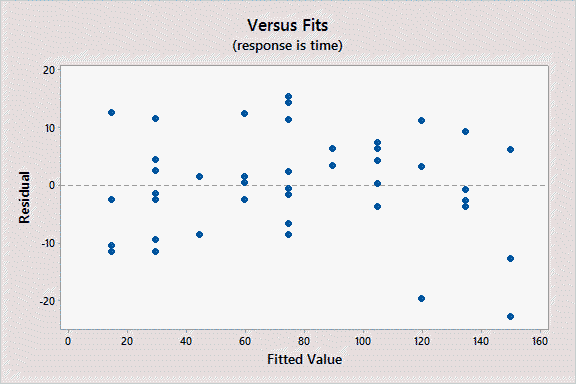

In [233]:
# Residuals vs. X (copiers)
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Residuals-vs-Fits-for-time.png')

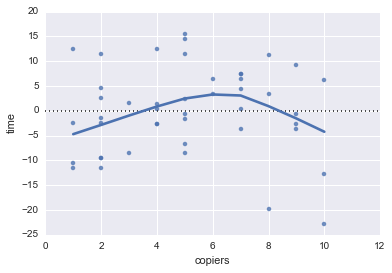

In [234]:
# Residuals vs. X (copiers) in seaborn with a lowess smoother
sns.residplot(x='copiers', y='time', data=df4, lowess=True)

Yes, residuals vs. fits and residuals vs. X provide the same information since the fits are linearly related to X. Error variance appears to be fairly constant. A slight linear correlation can be seen in the residuals, however, and the last graph with the lowess smoother helps show it more clearly: the residuals tend to be negative for lower and higher numbers of copiers and positive for the middle range of copier values. It looks similar to Figure 3.4b in the text, suggesting that a curvilinear regression might provide a better fit. However, it's possible that the three low time observations at X=8 and X=10 are the culprits behind this pattern. 

e. 

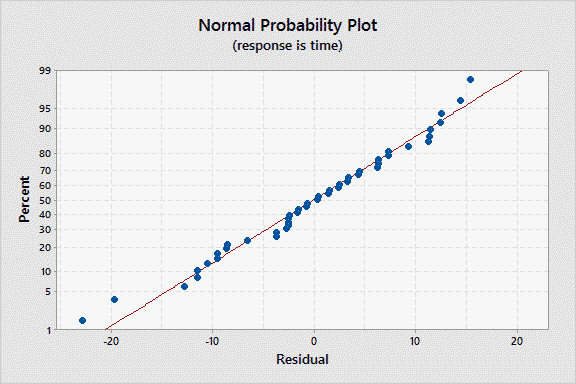

In [235]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Normplot-of-Residuals-for-time.png')

After calculating expected values of the residuals under normality manually in Minitab, I found $R^2=97.85\%$:

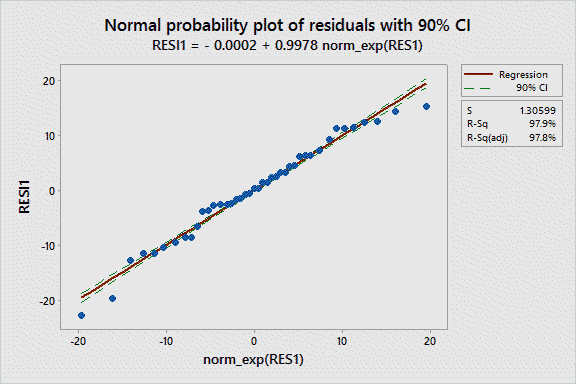

In [236]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Fitted-Line_-RESI1-versus-norm_exp(RES1).png')

In [237]:
np.sqrt(.9785)

0.9891915891272024

$r = \sqrt{0.9785} = 0.989$. Table B.6 shows, for $\alpha=0.1$, the critical value for n=40 is 0.977 and for n=50 is 0.981. Doing a weighted average for n=45:

In [238]:
0.977 + (0.981-0.977)/2

0.979

Our $r$ value of 0.989 > 0.979, so the normality assumption is tenable here.

f.

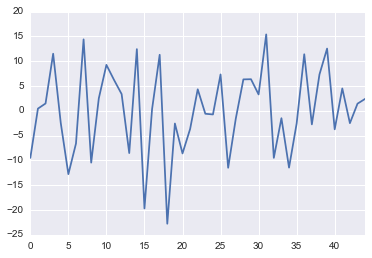

In [239]:
sns.tsplot(lr4.resid)

There doesn't appear to be a pattern to the time series of residuals. 

g. 
Using the Breusch-Pagan heteroscedasticity test from the statsmodels package:

In [240]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breushpagan(lr4.resid, lr4.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 1.4186806143688164),
 ('p-value', 0.23362068957554594),
 ('f-value', 1.3997572188686898),
 ('f p-value', 0.2432643478004832)]

$H_0: \gamma_1=0$ (error variance is constant)  
$H_a: \gamma_1 \ne 0$ (error variance is not constant)  

If the P-value of the BP test is less than $\alpha$, conclude $H_a$, else conclude $H_0$. 

Since the p-value is 0.234 > 0.05, we conclude $H_0$, that error variance is constant. 

h. 

I take this to mean that I am supposed to be plotting the residuals from regressing repair time on number of copiers against these other potential predictor variables. 

In [241]:
# Load the new data set including the two new columns
df4_2 = pd.read_table('/Users/kevin/Dropbox/School/STA-580/ch3hw/ch3.4data.txt', 
    sep='\t', index_col=False, names=['time_to_repair', 'num_copiers',
                      'mean_copier_age', 'years_experience'])
df4_2.head()  # show the first five rows

,time_to_repair,num_copiers,mean_copier_age,years_experience
0,20,2,20,4
1,60,4,19,5
2,46,3,27,4
3,41,2,32,1
4,12,1,24,4


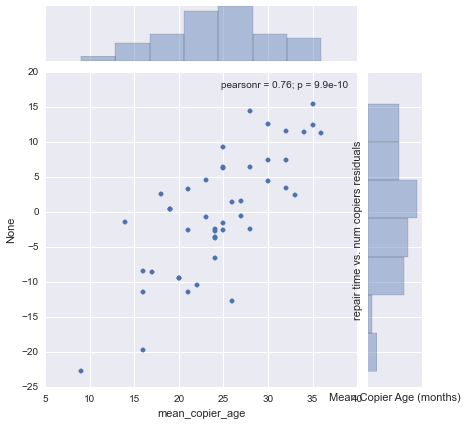

In [242]:
# Plot residuals against mean copier age
sns.jointplot(x=df4_2.mean_copier_age, y=lr4.resid, kind='scatter')
sns.axlabel(xlabel='Mean Copier Age (months)', 
           ylabel='repair time vs. num copiers residuals')

There's clearly a positive linear relationship between residuals and the mean copier age. This means that the fitted line underestimates repair time for older machines and overestimates for younger machines. The model would be improved by including this variable. 

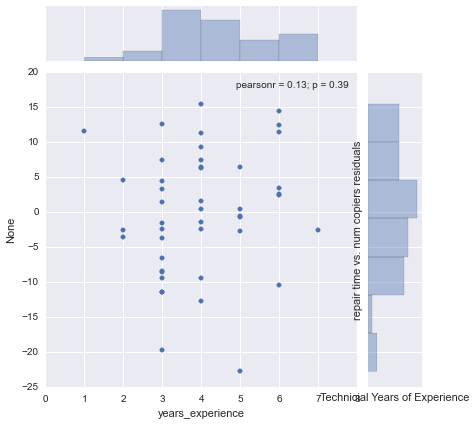

In [243]:
# Plot residuals against technician years of experience
sns.jointplot(x=df4_2.years_experience, y=lr4.resid, kind='scatter')
sns.axlabel(xlabel='Technicial Years of Experience', 
           ylabel='repair time vs. num copiers residuals')

There does not appear to be a relationship between residuals and technicial years of experience, so there is _not_ evidence to suggest the model would be improved by including this variable. 

## 13.



a. 

$H_0: E\{Y\}=\beta_0+\beta_1X$ (there is a linear relationship)  
$H_a: E\{Y\}\ne\beta_0+\beta_1X$ (there is _not_ a linear relationship)

b. 

If $F^* \le F(1-\alpha;c-2;n-c)$, conclude $H_0$  
If $F^* > F(1-\alpha;c-2;n-c)$, conclude $H_a$

Since I cannot find a way to get the lack of fit F statistic from python, I'll have to use the Minitab ANOVA table:

    Regression Analysis: time versus copiers 

    Analysis of Variance

    Source         DF   Seq SS  Contribution   Adj SS   Adj MS  F-Value  P-Value
    Regression      1  76960.4        95.75%  76960.4  76960.4   968.66    0.000
      copiers       1  76960.4        95.75%  76960.4  76960.4   968.66    0.000
    Error          43   3416.4         4.25%   3416.4     79.5
      Lack-of-Fit   8    618.7         0.77%    618.7     77.3     0.97    0.477
      Pure Error   35   2797.7         3.48%   2797.7     79.9
    Total          44  80376.8       100.00%
    
We see that $F^*=0.97$ and the P-value of the lack-of-fit test is 0.477.

The F-value to which we are comparing:

In [244]:
c = 10
st.f.ppf(0.95, c-2, lr4.nobs-c)

2.2166750326752012

Since $F^*$ 0.97 < 2.15 (and P-value 0.477 > 0.05), we conclude $H_0$, meaning there is not evidence for a lack of fit, meaning our linear regression is appropriate. 

c. 

No, the lack of fit test _assumes_ independence, constant variance and normality of error terms. Yes, the results of the lack of fit test could be affected by other departures from regression model (2.1), which is why other tests should be performed first. 

## 17.

a. 

In [245]:
df_sales = pd.read_table('/Users/kevin/Dropbox/School/STA-580/ch3hw/CH03PR17.txt',
                        sep='    ', index_col=False, names=['sales', 'year'],
                        engine='python')
df_sales.head()

,sales,year
0,98,0
1,135,1
2,162,2
3,178,3
4,221,4


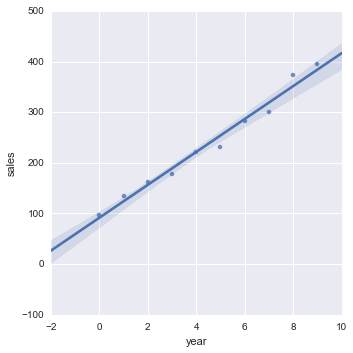

In [246]:
sns.lmplot('year', 'sales', df_sales)

Yes, a linear relationship is appropriate here. 

b. 

Performing a linear regression with "optimal" Box-Cox $\lambda$ in Minitab results in $\lambda=0.516$, so I expect $\lambda=0.5$ to have the smallest SSE.

| $\lambda$ | $SSE$ | Error Contribution (%) | $R^2$ (%) |
|-----------|-------|--------------------|-------|
|0.3|0.05260|1.30|98.7|
|0.4|0.2416|1.15|98.85|
|0.5|1.050|1.09|98.91|
|0.6|4.564|1.11|98.89|
|0.7|20.21|1.22|98.78|

It appears that the SSE values reported by Minitab are not standardized according to (3.36), meaning they _are_ dependent on lambda. If this is true, I cannot compare the SSE value reported from one value of $\lambda$ to another. It would explain why SSE just keeps getting larger for larger $\lambda$. Therefore, I added columns for error contribution and $R^2$. As you can see, $\lambda=0.5$ minimizes error contribution and maximizes $R^2$, so $Y' = Y^{0.5} = \sqrt Y$ is the suggested transformation.

c. 

$$
\begin{aligned}
\sqrt Y &= Y' \\
\hat Y' &= 10.261 + 1.0763X
\end{aligned}
$$

d. 

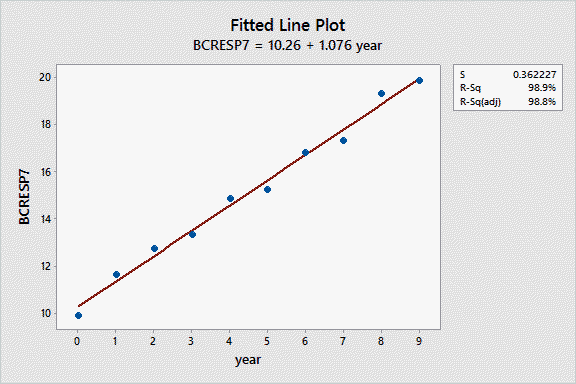

In [247]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Fitted-Line_-BCRESP7-versus-year.png')

Yes, the regression line appears to be a good fit for the data.

e. 

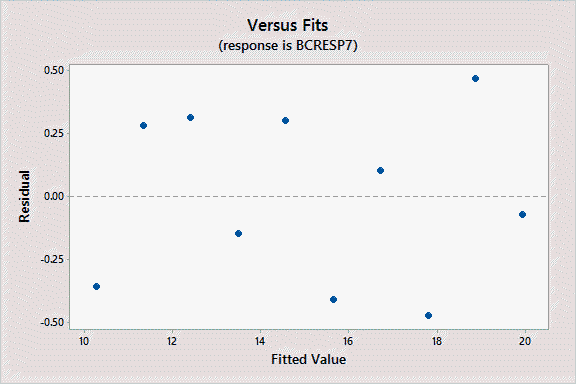

In [248]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Residuals-vs-Fits-for-BCRESP7.png')

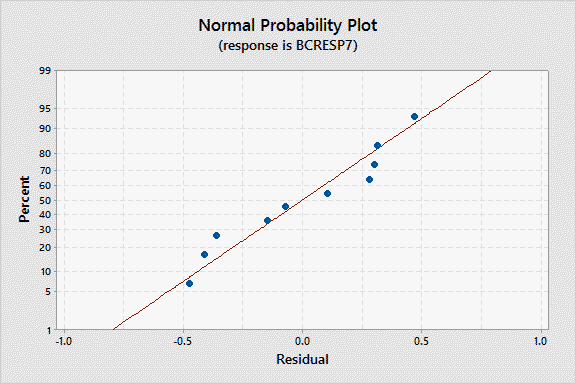

In [249]:
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Normplot-of-Residuals-for-BCRESP7.png')

Based on the graph of residuals vs. fits, it appears that error variance is roughly constant and error terms are independent. Based on the normal probability plot of residuals, it appears that the errors are roughly normally distributed. 

f. 

$$
\begin{aligned}
\sqrt{\hat Y} = \hat Y' &= 10.261+1.0763X \\
\hat Y &= (10.261+1.0763X)^2 \\
\hat Y &= 105.288 + 22.088X + 1.158X^2
\end{aligned}
$$

## 18.

a.

In [250]:
df_prod = pd.read_table('/Users/kevin/Dropbox/School/STA-580/ch3hw/CH03PR18.txt',
                       sep=r'\s*', index_col=False, 
                       names=['time', 'size'], engine='python')
df_prod.head()

,time,size
0,14.28,15
1,8.80,9
2,12.49,7
3,9.38,4
4,10.89,9


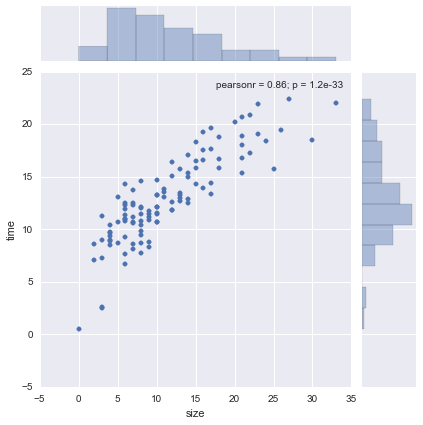

In [251]:
sns.jointplot('size', 'time', df_prod)

A linear relationship could work, but there's a slight concave down curve to the data. I think a transformation on X would be more appropriate because it looks like variance is close to constant.

b. 

In [252]:
df_prod['sqrt_size'] = np.sqrt(df_prod['size'])
df_prod.head()

,time,size,sqrt_size
0,14.28,15,3.872983
1,8.80,9,3.000000
2,12.49,7,2.645751
3,9.38,4,2.000000
4,10.89,9,3.000000


In [253]:
y_prod = df_prod.time
x_prod = df_prod['sqrt_size']
x_prod = sm.add_constant(x_prod)
lr_prod = sm.OLS(y_prod, x_prod).fit()
lr_prod.params

const        1.254697
sqrt_size    3.623520
dtype: float64

$$\hat Y = 1.255 + 3.624X'$$

c. 

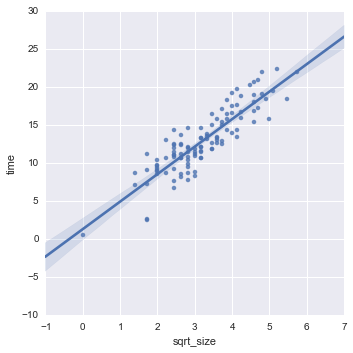

In [254]:
sns.lmplot('sqrt_size', 'time', df_prod)

Yes, the regression line appears to be a good fit to the transformed data.

d. 

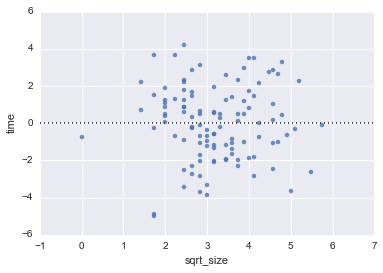

In [255]:
sns.residplot(x='sqrt_size', y='time', data=df_prod)

There are possibly two outliers, but they're not that far away from the rest of the data. The residuals look to be shifted slightly positive for lower lot sizes, though this is somewhat balanced by the two "outliers."

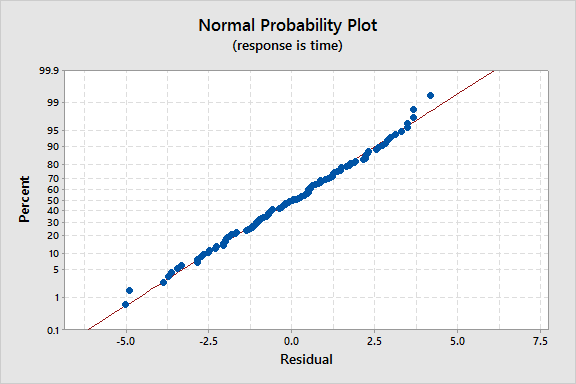

In [256]:
# I still don't know how to produce a normal prob plot in python, so I use Minitab 
Image(filename='/Users/kevin/Dropbox/School/STA-580/ch3hw/Normplot-of-Residuals-for-time-and-transformed-lot-size.png')

The residuals are normally distributed. 

e.

$$\hat Y = 1.255 + 3.624\sqrt X$$